In [10]:
from main import *
from bovw import *
from plotting import *

In [11]:
import os
import random
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [12]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

In [13]:
data_train = Dataset(ImageFolder="../data/places_reduced/train")
data_test = Dataset(ImageFolder="../data/places_reduced/val")

len(data_train), len(data_test)

(8700, 2200)

In [14]:
random.shuffle(data_train)
random.shuffle(data_test)

enable_cache()

In [15]:
classifier_results = {}

codebook_sizes = [16, 32, 64, 128, 256]

for codebook_size in codebook_sizes:
    bovw_params = {
        "detector_type": "SIFT",
        "encoding_method": "fisher",
        "codebook_size": codebook_size,
        "descriptor_normalization": "L2",
        "joint_descriptor_normalization": "Standard",  #Necessary for Fisher Vectors in logistic regression
        "detector_kwargs": {"nfeatures": 1000},
        "dimensionality_reduction": "PCA", #Necessart for Fisher Vectors
        "dimensionality_reduction_kwargs": {"n_components": 64},
        "pyramid_levels": None, 
    }
    
    classifier_cls = LogisticRegression
    classifier_params = {
        "max_iter": 1000,
        "class_weight": "balanced",
    }
    
    scores = cross_validate_bovw(
        dataset=data_train,
        bovw_kwargs=bovw_params,
        classifier_cls=classifier_cls,
        classifier_kwargs=classifier_params,
        n_splits=5
    )
    
    classifier_results[codebook_size] = scores



print("\nSUMMARY")
for cb in classifier_results.keys():
    print(f"Cb Size={cb} -> Accuracy Train: {classifier_results[cb].train.accuracy.mean:.4f} ± {classifier_results[cb].train.accuracy.std:.4f}")
    print(f"Cb Size={cb} -> Accuracy Val: {classifier_results[cb].val.accuracy.mean:.4f} ± {classifier_results[cb].val.accuracy.std:.4f}")
    print()

Phase [Setup]: Extracting the descriptors:   0%|          | 0/8700 [00:00<?, ?it/s]

Phase [Setup]: Extracting the descriptors:   6%|▌         | 515/8700 [00:02<00:35, 232.21it/s]

Could not compute descriptors for image ../data/places_reduced/train\water_ice_snow\iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors:  59%|█████▊    | 5108/8700 [00:27<00:13, 262.63it/s]

Could not compute descriptors for image ../data/places_reduced/train\mountains_hills_desert_sky\sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:   6%|▌         | 525/8700 [00:01<00:26, 308.34it/s]

Could not compute descriptors for image ../data/places_reduced/train\water_ice_snow\iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors:  59%|█████▊    | 5104/8700 [00:17<00:13, 276.01it/s]

Could not compute descriptors for image ../data/places_reduced/train\mountains_hills_desert_sky\sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:   6%|▌         | 507/8700 [00:01<00:25, 321.77it/s]

Could not compute descriptors for image ../data/places_reduced/train\water_ice_snow\iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors:  59%|█████▉    | 5113/8700 [00:16<00:16, 221.15it/s]

Could not compute descriptors for image ../data/places_reduced/train\mountains_hills_desert_sky\sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:   6%|▌         | 501/8700 [00:01<00:29, 274.40it/s]

Could not compute descriptors for image ../data/places_reduced/train\water_ice_snow\iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors:  59%|█████▉    | 5142/8700 [00:38<00:08, 410.39it/s]

Could not compute descriptors for image ../data/places_reduced/train\mountains_hills_desert_sky\sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:   6%|▌         | 527/8700 [00:02<00:26, 310.26it/s]

Could not compute descriptors for image ../data/places_reduced/train\water_ice_snow\iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors:  59%|█████▉    | 5139/8700 [00:16<00:08, 413.83it/s]

Could not compute descriptors for image ../data/places_reduced/train\mountains_hills_desert_sky\sky_00001410.jpg of class 5.


100%|██████████| 5/5 [3:56:39<00:00, 2839.83s/it]  


SUMMARY
Cb Size=16 -> Accuracy Train: 0.6389 ± 0.0045
Cb Size=16 -> Accuracy Val: 0.3680 ± 0.0098

Cb Size=32 -> Accuracy Train: 0.7144 ± 0.0065
Cb Size=32 -> Accuracy Val: 0.3670 ± 0.0066

Cb Size=64 -> Accuracy Train: 0.7869 ± 0.0046
Cb Size=64 -> Accuracy Val: 0.3740 ± 0.0091

Cb Size=128 -> Accuracy Train: 0.8609 ± 0.0011
Cb Size=128 -> Accuracy Val: 0.3701 ± 0.0044

Cb Size=256 -> Accuracy Train: 0.9136 ± 0.0019
Cb Size=256 -> Accuracy Val: 0.3625 ± 0.0080



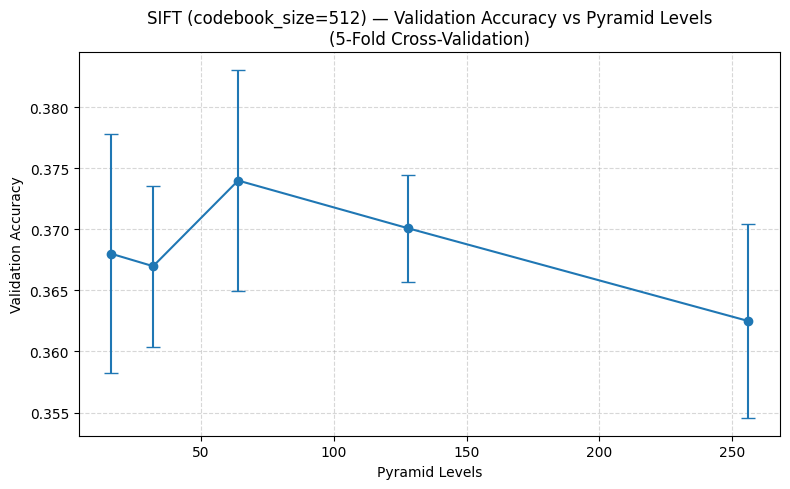

In [16]:
# Plot the validation accuracy vs pyramid levels
x_values = list(classifier_results.keys())
means = [classifier_results[cb].val.accuracy.mean for cb in x_values]
stds = [classifier_results[cb].val.accuracy.std for cb in x_values]

plot_cv_accuracy(
    x_values=x_values,
    means=means,
    stds=stds,
    descriptor_name="SIFT (codebook_size=512)",
    hyperparam_name="Pyramid Levels"
)